In [1]:
import seaborn as sns
sns.set(font_scale=1)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn')

plt.rcParams['axes.unicode_minus'] = False # " - " 기호 Unicode 처리
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정

In [3]:
retail = pd.read_csv("../../data/dataset/Online Retail Clean.csv")

In [4]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])

In [13]:
COLORS = sns.color_palette()
# 차트 함수화
def plot_bar(df, xlabel, ylabel, title, color=COLORS[-1], figsize=(20,10), rotation=45):
    plot = df.plot(kind="bar", color=color, figsize=figsize)
    plot.set_xlabel(xlabel, fontsize=11)
    plot.set_ylabel(ylabel, fontsize=11)
    plot.set_title(title, fontsize=13)
    plot.set_xticklabels(labels=df.index,rotation=45)

#### 쿠폰발송

- 쿠폰발송 ? 언제? 
- InvoiceDate 이용

#### 시간대별 주문건수

In [11]:
order_by_hour = retail.set_index("InvoiceDate").groupby(lambda date:date.hour)['CheckoutPrice'].count()
order_by_hour

InvoiceDate
6         1
7       379
8      8690
9     21944
10    37997
11    49084
12    72065
13    64026
14    54118
15    45369
16    24089
17    13071
18     2928
19     3321
20      802
Name: CheckoutPrice, dtype: int64

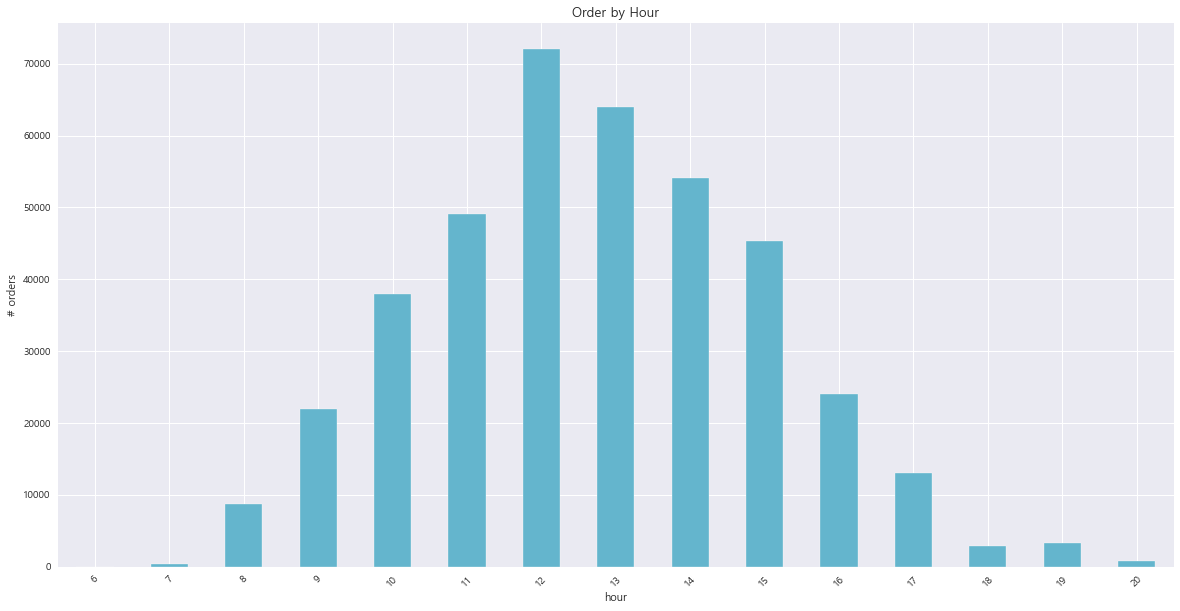

In [16]:
plot_bar(order_by_hour, 'hour', '# orders', 'Order by Hour')

In [17]:
def half_an_hour(date):
    minute = ':00'
    
    if date.minute > 30 :
        minute = ':30'
    hour = str(date.hour)
    
    if date.hour < 10:
        hour = '0' + hour
        
    return hour + minute

In [20]:
order_by_hour_half = retail.set_index('InvoiceDate').groupby(half_an_hour)['CustomerID'].count()
order_by_hour_half

InvoiceDate
06:00        1
07:30      379
08:00     3145
08:30     5545
09:00     9364
09:30    12580
10:00    16950
10:30    21047
11:00    18925
11:30    30159
12:00    37174
12:30    34891
13:00    31131
13:30    32895
14:00    26958
14:30    27160
15:00    24227
15:30    21142
16:00    14316
16:30     9773
17:00     8889
17:30     4182
18:00     1715
18:30     1213
19:00     1534
19:30     1787
20:00      802
Name: CustomerID, dtype: int64

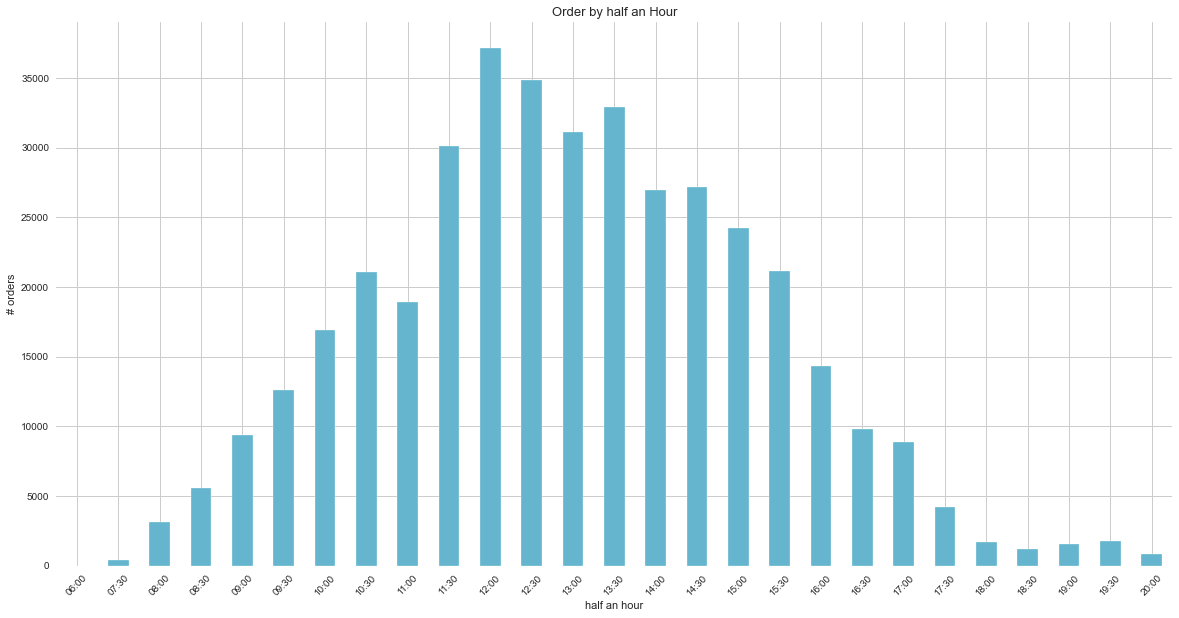

In [22]:
sns.set_style('whitegrid')
plot_bar(order_by_hour_half, 'half an hour', '# orders', 'Order by half an Hour')

In [23]:
order_by_hour_half / order_by_hour_half.sum() * 100  

InvoiceDate
06:00    0.000251
07:30    0.095254
08:00    0.790431
08:30    1.393622
09:00    2.353450
09:30    3.161726
10:00    4.260036
10:30    5.289733
11:00    4.756411
11:30    7.579847
12:00    9.342924
12:30    8.769139
13:00    7.824140
13:30    8.267485
14:00    6.775342
14:30    6.826110
15:00    6.088961
15:30    5.313609
16:00    3.598034
16:30    2.456244
17:00    2.234068
17:30    1.051060
18:00    0.431030
18:30    0.304863
19:00    0.385540
19:30    0.449126
20:00    0.201566
Name: CustomerID, dtype: float64

#### 개인화된 push notification
- 아마존을 필두로 개인화하여 맞춤으로 사용자마다 최적의 솔루션을 찾는 것이 트렌드

- 사용자별 시간대별 주문량 계산

In [27]:
# 1234 아이디, 10 : 1, 11 : 10..

order_count_by_hour = retail.set_index('InvoiceDate').groupby(['CustomerID',lambda date:date.hour])['StockCode'].count()

In [28]:
order_count_by_hour

CustomerID  InvoiceDate
12346       10              1
12347       8              22
            10             24
            12             47
            13             18
                           ..
18283       15              1
            16             56
            19             87
18287       9               3
            10             67
Name: StockCode, Length: 11205, dtype: int64

In [30]:
# idxmax : 최대값을 가지고 있는 인덱스 추출

order_count_by_hour.groupby('CustomerID').idxmax()

CustomerID
12346    (12346, 10)
12347    (12347, 14)
12348    (12348, 19)
12349     (12349, 9)
12350    (12350, 16)
            ...     
18280     (18280, 9)
18281    (18281, 10)
18282    (18282, 13)
18283    (18283, 14)
18287    (18287, 10)
Name: StockCode, Length: 4338, dtype: object